<a href="https://colab.research.google.com/github/Praveennayak22/STT_AI1/blob/main/STT_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: MLP Model Implementation & Experiment Tracking

1. Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels reshaped to column vector

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

np.random.seed(30)
# Shuffle and split the dataset into 70% training, 30% remaining (for validation & testing)
X_train, X_rem, y_train, y_rem = train_test_split(X, y_one_hot, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Further split the remaining 30% into 10% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=2/3, random_state=42, shuffle=True, stratify=y_rem)

# Normalize feature values to [0,1] using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Print shapes to verify correct splitting
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (105, 4), y_train shape: (105, 3)
X_val shape: (15, 4), y_val shape: (15, 3)
X_test shape: (30, 4), y_test shape: (30, 3)


2. Define and Train the MLP Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# MLP model
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    verbose=1
)

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5494 - loss: 1.0675 - val_accuracy: 0.6000 - val_loss: 1.0685
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6337 - loss: 1.0539 - val_accuracy: 0.6000 - val_loss: 1.0601
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6552 - loss: 1.0516 - val_accuracy: 0.6667 - val_loss: 1.0521
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6736 - loss: 1.0408 - val_accuracy: 0.6667 - val_loss: 1.0443
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7045 - loss: 1.0345 - val_accuracy: 0.6667 - val_loss: 1.0367
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6295 - loss: 1.0328 - val_accuracy: 0.6667 - val_loss: 1.0292
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6857 - loss: 1.0175 - val_accuracy: 0.6667 - val_loss: 1.0219
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6920 - loss: 1.0087 - val_accuracy: 0.6667 - val_loss: 1.0148

3. Evaluate Model Performance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Test Accuracy: 0.6667
Test Precision: 0.5000
Test Recall: 0.6667
Test F1 Score: 0.5556


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


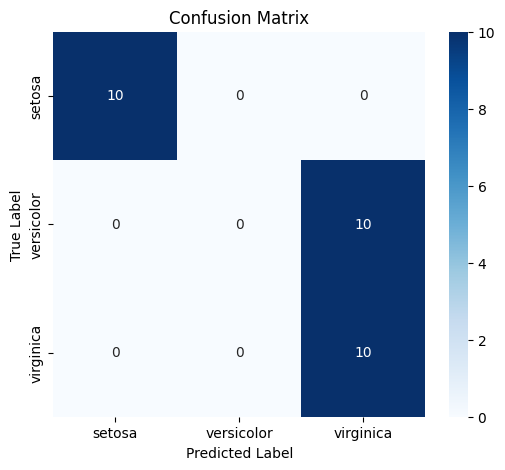

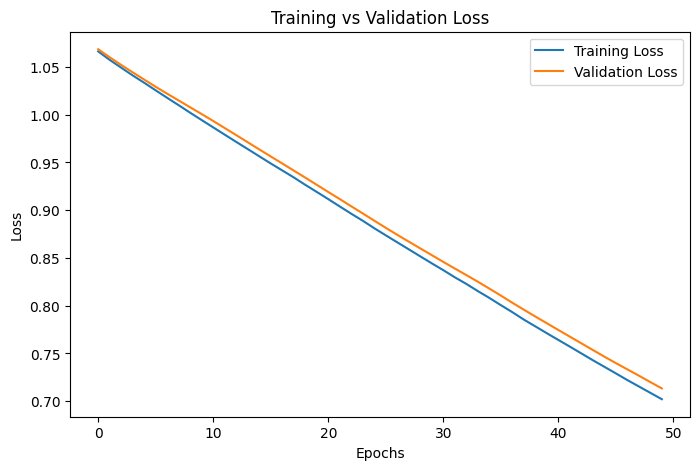

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Evaluate on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
!pip install wandb torch torchvision

4. Set Up Experiment Tracking with Weights & Biases (W&B)

[1.0662579536437988, 1.057373046875, 1.0492340326309204, 1.0410761833190918, 1.0334042310714722, 1.0254707336425781, 1.0176204442977905, 1.0098949670791626, 1.0020103454589844, 0.9943312406539917, 0.9866968989372253, 0.9790731072425842, 0.9714941382408142, 0.9640011787414551, 0.9564534425735474, 0.948925793170929, 0.9416581392288208, 0.9343229532241821, 0.9265685081481934, 0.9191353917121887, 0.9116151332855225, 0.903914213180542, 0.8962990641593933, 0.88896644115448, 0.8811303377151489, 0.8737032413482666, 0.8663638830184937, 0.8590317368507385, 0.8516749739646912, 0.844371497631073, 0.837243378162384, 0.8297560214996338, 0.82285475730896, 0.8153321146965027, 0.8081830143928528, 0.800632655620575, 0.7932612895965576, 0.7854962348937988, 0.7783823609352112, 0.7712257504463196, 0.7641766667366028, 0.7571942210197449, 0.7500700354576111, 0.7429492473602295, 0.7360657453536987, 0.7291654348373413, 0.7221595644950867, 0.7154979109764099, 0.7088004946708679, 0.702105700969696]
[1.0685449838

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


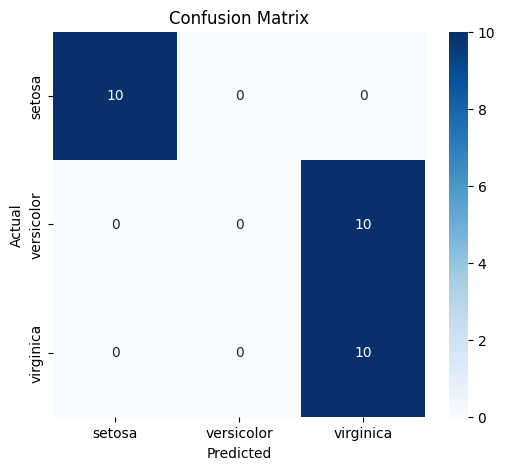

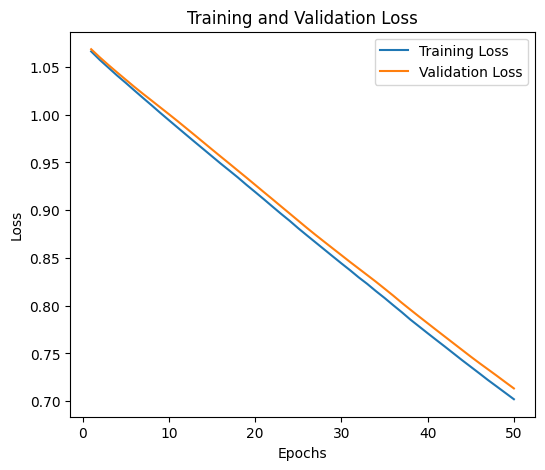

Test accuracy,▁
Test f1_score,▁
Test precision,▁
Test recall,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
training_loss,████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
validation_loss,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
Test accuracy,0.66667
Test f1_score,0.55556
Test precision,0.5
Test recall,0.66667


In [ ]:
import wandb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize W&B run
wandb.init(project="mlp-iris-experiment", name="MLP_Iris")

validation_loss=history.history['val_loss']
training_loss=history.history['loss']

print(training_loss)
print(validation_loss)

# Log model architecture
config = {
    "Number_of_layers":3,
    "architecture": "MLP",
    "input_layer_neurons": 4,
    "hidden_layer_neurons": 16,
    "output_layer_neurons": 3,
    "activation_hidden_layer": "ReLU",
    "activation_output_layer": "Softmax",
    "loss_function": "Categorical Crossentropy",
    "optimizer": "Adam",
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50,
}
wandb.config.update(config)

# Log training and validation loss per epoch
for epoch in range(len(history.history['loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": history.history['loss'][epoch],
        "validation_loss": history.history['val_loss'][epoch]
        })
wandb.log({"Validation Loss": validation_loss})
wandb.log({"Training Loss": training_loss})

# Evaluate model performance on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average="weighted")
recall = recall_score(y_test_classes, y_pred_classes, average="weighted")
f1 = f1_score(y_test_classes, y_pred_classes, average="weighted")
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Log final evaluation metrics
wandb.log({
    "Test accuracy": accuracy,
    "Test precision": precision,
    "Test recall": recall,
    "Test f1_score": f1
})

# Plot and log confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.show()


epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(6, 5))
plt.plot(epochs, history.history['loss'], label="Training Loss")
plt.plot(epochs, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
wandb.log({"Loss Curve": wandb.Image(plt)})
plt.show()


wandb.finish()

Section 2: Hyperparameters

Task 1: Hyperparameter Optimization


Training with Batch Size=2, Learning Rate=0.001, Epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6044 - loss: 1.0595 - val_accuracy: 0.6000 - val_loss: 1.0002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


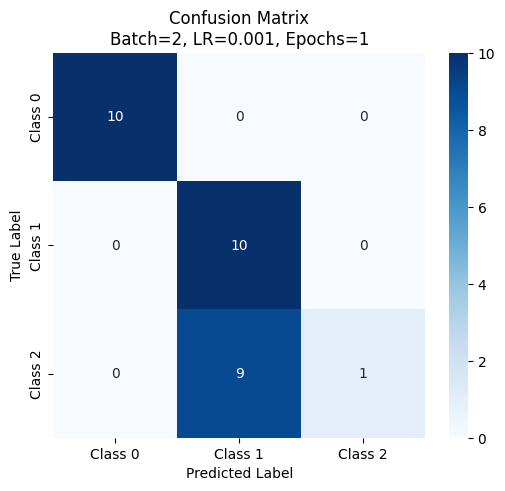

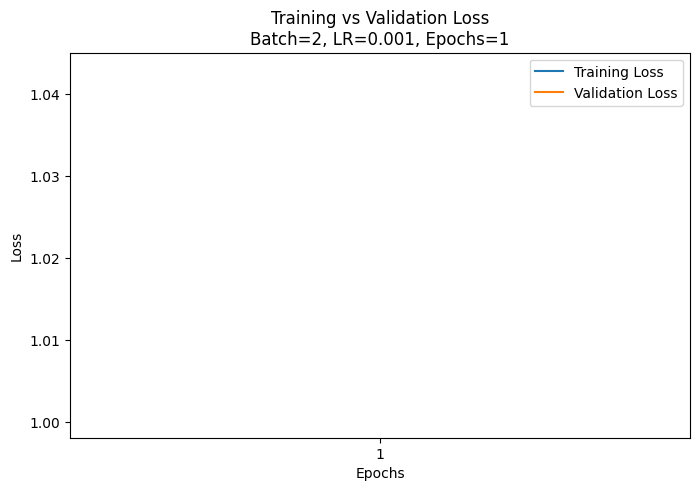


Training with Batch Size=2, Learning Rate=0.001, Epochs=3
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1868 - loss: 1.0950 - val_accuracy: 0.6000 - val_loss: 1.0583
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6562 - loss: 1.0504 - val_accuracy: 0.6667 - val_loss: 1.0134
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6726 - loss: 0.9939 - val_accuracy: 0.6667 - val_loss: 0.9654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


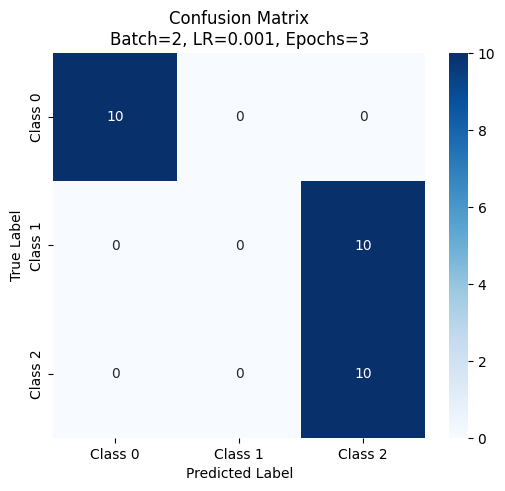

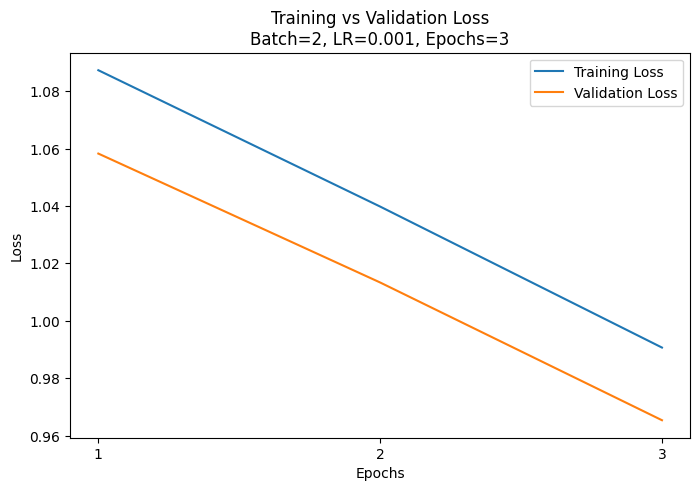


Training with Batch Size=2, Learning Rate=0.001, Epochs=5
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2203 - loss: 1.1464 - val_accuracy: 0.3333 - val_loss: 1.0874
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3109 - loss: 1.0728 - val_accuracy: 0.3333 - val_loss: 1.0327
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3267 - loss: 0.9917 - val_accuracy: 0.4000 - val_loss: 0.9738
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4401 - loss: 0.9353 - val_accuracy: 0.6667 - val_loss: 0.9063
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6629 - loss: 0.8721 - val_accuracy: 0.6667 - val_loss: 0.8469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


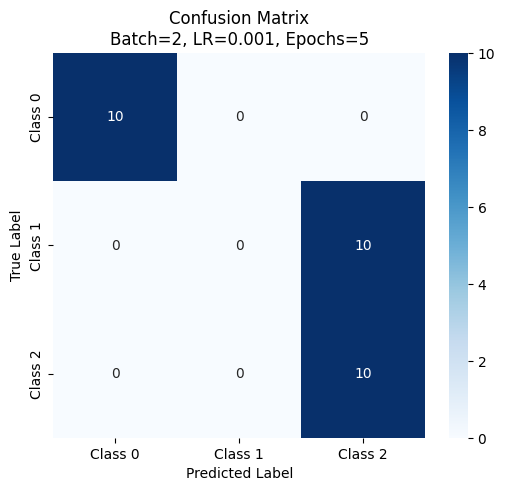

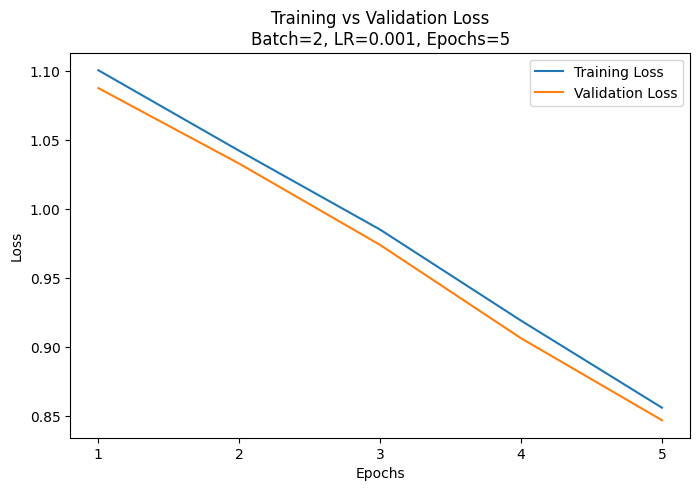


Training with Batch Size=2, Learning Rate=1e-05, Epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2769 - loss: 1.1545 - val_accuracy: 0.3333 - val_loss: 1.1478


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


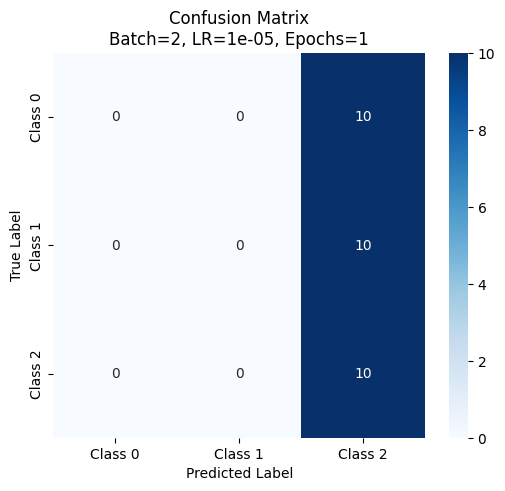

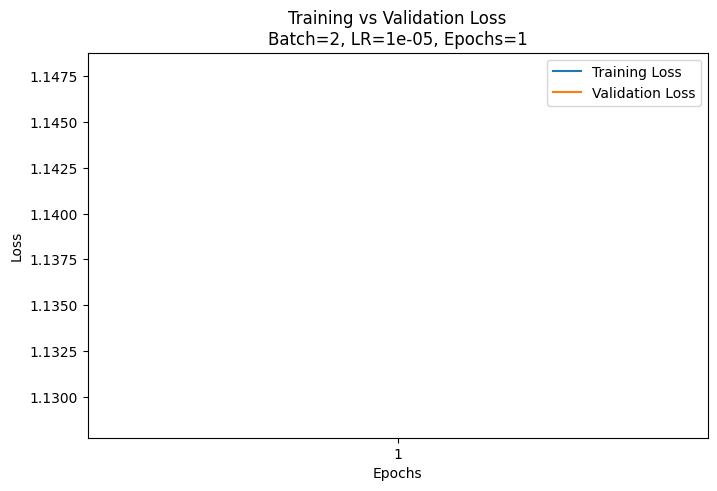


Training with Batch Size=2, Learning Rate=1e-05, Epochs=3
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5673 - loss: 1.0489 - val_accuracy: 0.6000 - val_loss: 1.0407
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5765 - loss: 1.0642 - val_accuracy: 0.6000 - val_loss: 1.0400
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5895 - loss: 1.0518 - val_accuracy: 0.6000 - val_loss: 1.0393


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


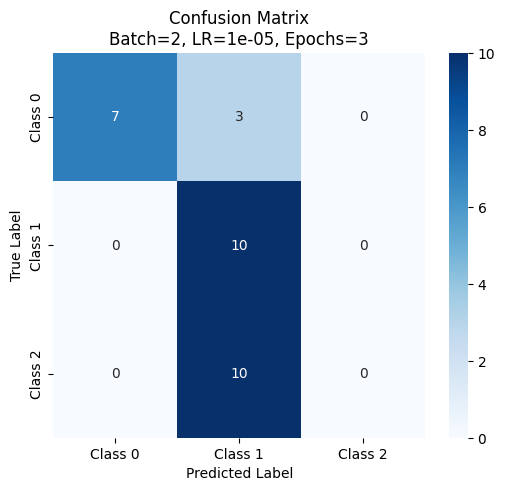

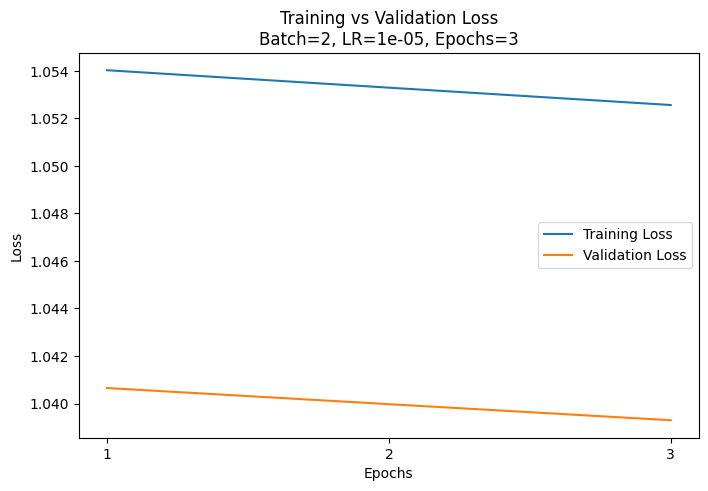


Training with Batch Size=2, Learning Rate=1e-05, Epochs=5
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.9840 - val_accuracy: 0.6000 - val_loss: 1.0542
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5991 - loss: 1.0818 - val_accuracy: 0.6667 - val_loss: 1.0535
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 1.0609 - val_accuracy: 0.6667 - val_loss: 1.0528
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6386 - loss: 1.0525 - val_accuracy: 0.6667 - val_loss: 1.0522
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6788 - loss: 1.0336 - val_accuracy: 0.6667 - val_loss: 1.0515
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


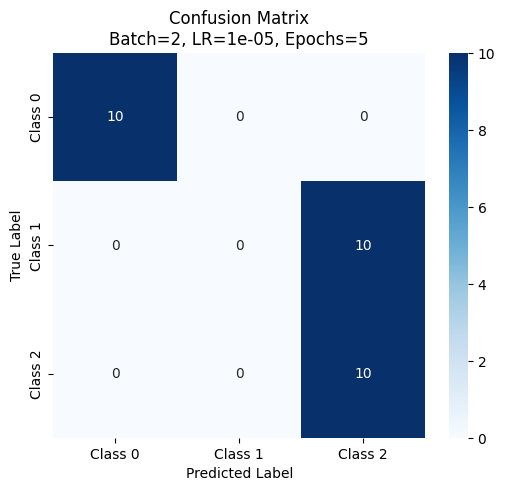

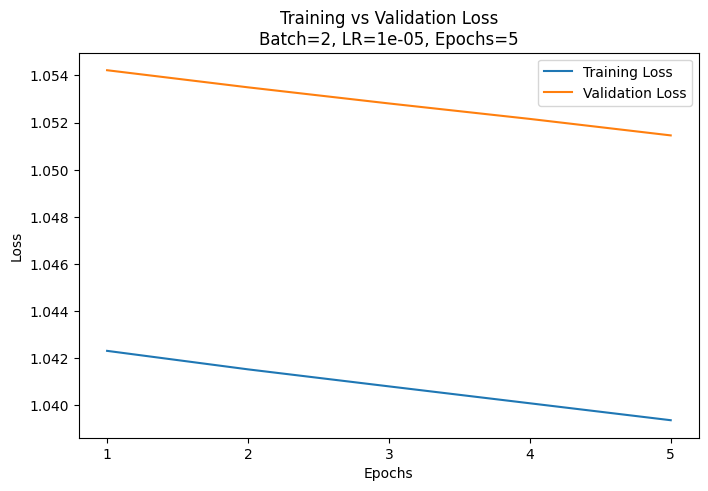


Training with Batch Size=4, Learning Rate=0.001, Epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3342 - loss: 1.0722 - val_accuracy: 0.3333 - val_loss: 1.0597
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


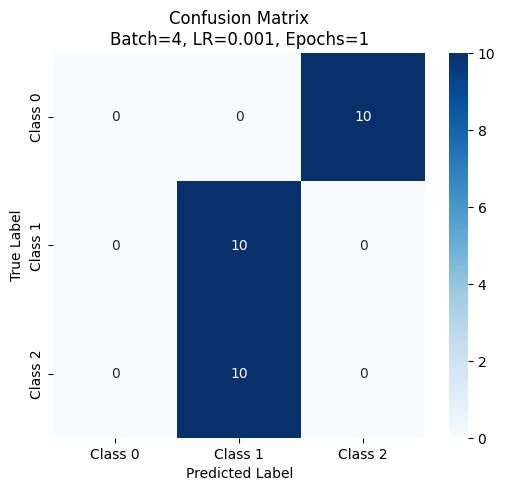

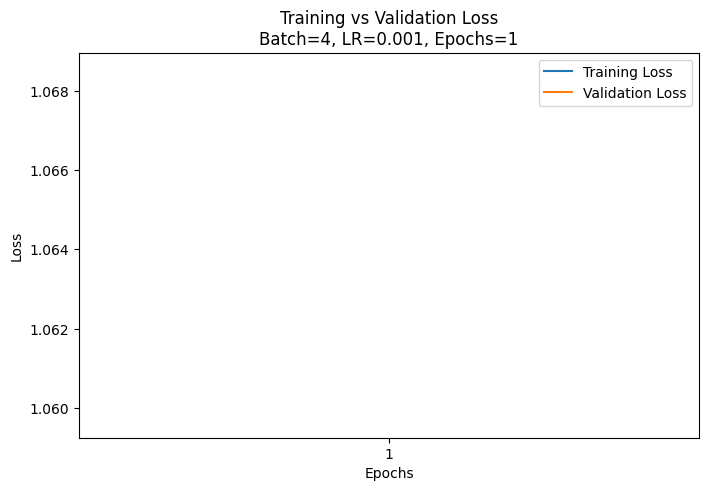


Training with Batch Size=4, Learning Rate=0.001, Epochs=3
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 1.3101 - val_accuracy: 0.0000e+00 - val_loss: 1.2693
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 1.2527 - val_accuracy: 0.0000e+00 - val_loss: 1.2091
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0082 - loss: 1.1763 - val_accuracy: 0.1333 - val_loss: 1.1643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


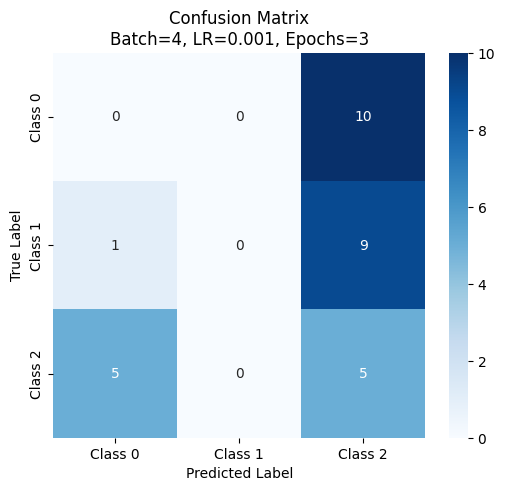

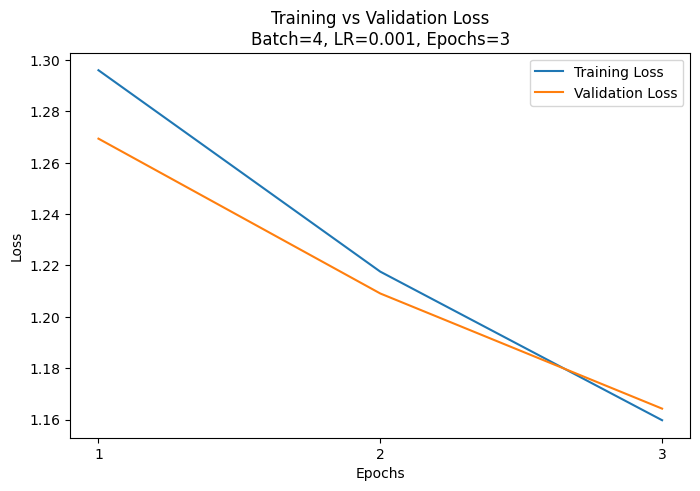


Training with Batch Size=4, Learning Rate=0.001, Epochs=5
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4640 - loss: 1.1019 - val_accuracy: 0.6667 - val_loss: 1.0328
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6425 - loss: 1.0477 - val_accuracy: 0.6667 - val_loss: 0.9999
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5903 - loss: 1.0248 - val_accuracy: 0.6667 - val_loss: 0.9699
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6243 - loss: 0.9900 - val_accuracy: 0.6667 - val_loss: 0.9400
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6721 - loss: 0.9566 - val_accuracy: 0.6667 - val_loss: 0.9125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


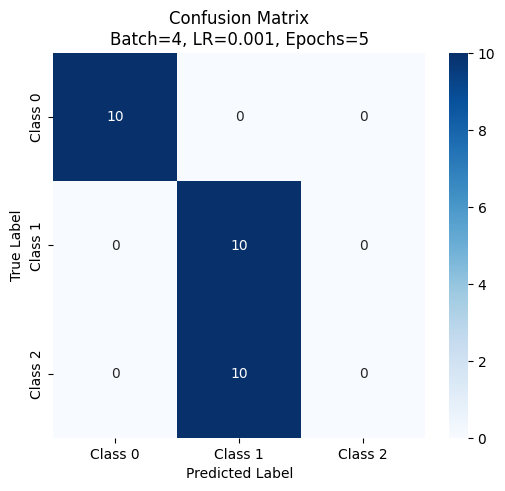

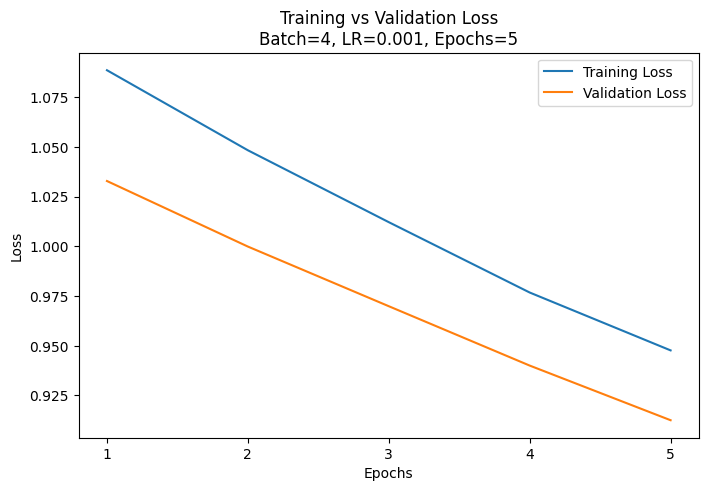


Training with Batch Size=4, Learning Rate=1e-05, Epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3242 - loss: 1.0806 - val_accuracy: 0.3333 - val_loss: 1.0855
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


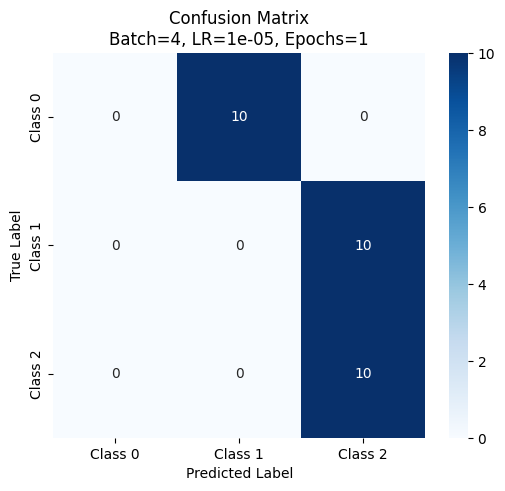

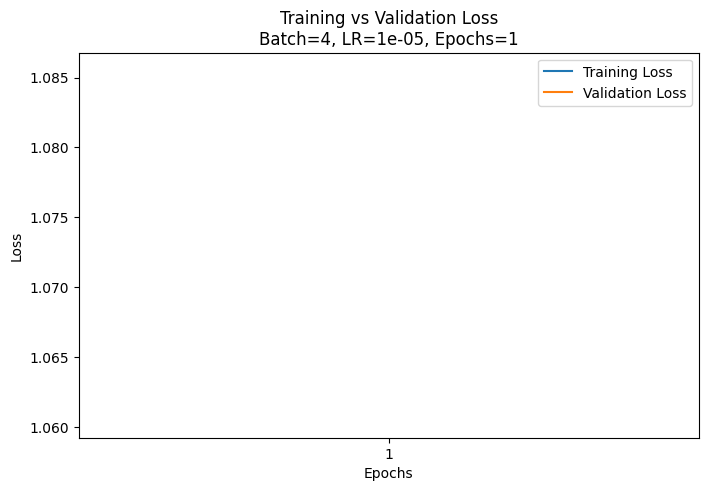


Training with Batch Size=4, Learning Rate=1e-05, Epochs=3
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2824 - loss: 1.1552 - val_accuracy: 0.3333 - val_loss: 1.1471
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3741 - loss: 1.1255 - val_accuracy: 0.3333 - val_loss: 1.1469
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3036 - loss: 1.1451 - val_accuracy: 0.3333 - val_loss: 1.1467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


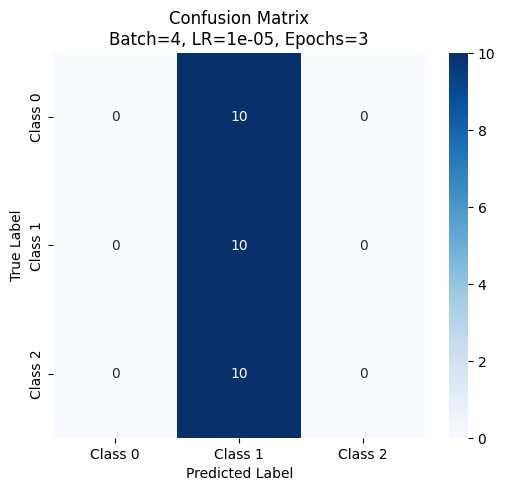

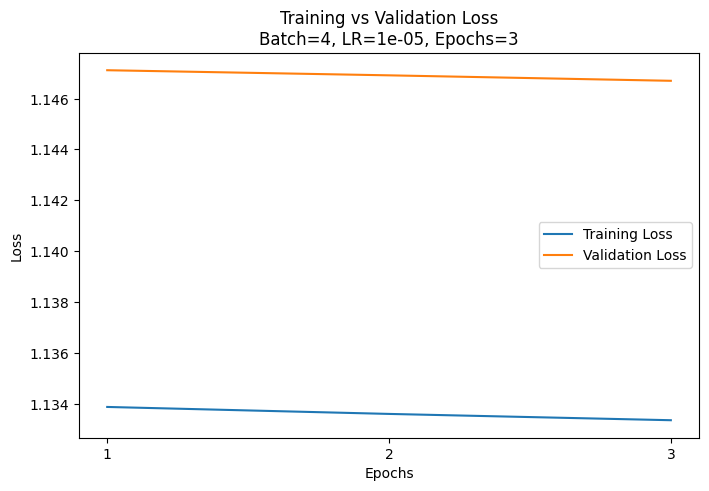


Training with Batch Size=4, Learning Rate=1e-05, Epochs=5
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0743 - loss: 1.1450 - val_accuracy: 0.1333 - val_loss: 1.1518
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0707 - loss: 1.1489 - val_accuracy: 0.1333 - val_loss: 1.1513
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0249 - loss: 1.1485 - val_accuracy: 0.1333 - val_loss: 1.1508
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0389 - loss: 1.1469 - val_accuracy: 0.1333 - val_loss: 1.1502
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0675 - loss: 1.1455 - val_accuracy: 0.1333 - val_loss: 1.1497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


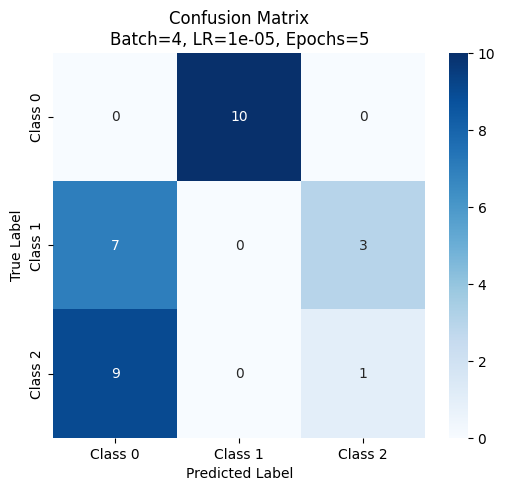

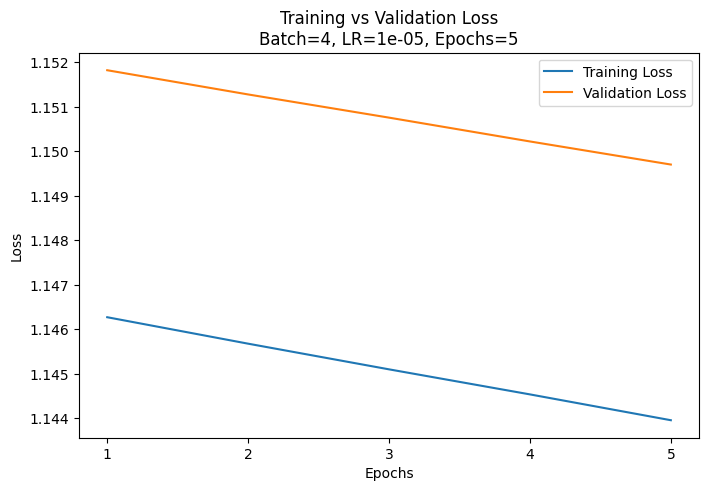


Configuration: Batch=2, LR=0.001, Epochs=1
Accuracy: 0.7000
F1 Score: 0.6238

Configuration: Batch=2, LR=0.001, Epochs=3
Accuracy: 0.6667
F1 Score: 0.5556

Configuration: Batch=2, LR=0.001, Epochs=5
Accuracy: 0.6667
F1 Score: 0.5556

Configuration: Batch=2, LR=1e-05, Epochs=1
Accuracy: 0.3333
F1 Score: 0.1667

Configuration: Batch=2, LR=1e-05, Epochs=3
Accuracy: 0.5667
F1 Score: 0.4765

Configuration: Batch=2, LR=1e-05, Epochs=5
Accuracy: 0.6667
F1 Score: 0.5556

Configuration: Batch=4, LR=0.001, Epochs=1
Accuracy: 0.3333
F1 Score: 0.2222

Configuration: Batch=4, LR=0.001, Epochs=3
Accuracy: 0.1667
F1 Score: 0.0980

Configuration: Batch=4, LR=0.001, Epochs=5
Accuracy: 0.6667
F1 Score: 0.5556

Configuration: Batch=4, LR=1e-05, Epochs=1
Accuracy: 0.3333
F1 Score: 0.2222

Configuration: Batch=4, LR=1e-05, Epochs=3
Accuracy: 0.3333
F1 Score: 0.1667

Configuration: Batch=4, LR=1e-05, Epochs=5
Accuracy: 0.0333
F1 Score: 0.0476

Sample Predictions:
Sample 1:
  Input Features: [0.63888889 0.3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = {}

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epochs_list:
            print(f"\nTraining with Batch Size={batch_size}, Learning Rate={lr}, Epochs={epochs}")

            model = keras.Sequential([
                layers.Input(shape=(4,)),
                layers.Dense(16, activation='relu'),
                layers.Dense(3, activation='softmax')
            ])

            # Compile model
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train the model
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                batch_size=batch_size,
                epochs=epochs,
                verbose=1
            )

            # Evaluate on test set
            y_pred_probs = model.predict(X_test)
            y_pred = np.argmax(y_pred_probs, axis=1)
            y_true = np.argmax(y_test, axis=1)

            # Compute metrics
            accuracy = accuracy_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred, average='macro')
            cm = confusion_matrix(y_true, y_pred)

            config_name = f"Batch={batch_size}, LR={lr}, Epochs={epochs}"
            results[config_name] = {
                "Accuracy": accuracy,
                "F1 Score": f1,
                "Confusion Matrix": cm,
                "Training Loss": history.history['loss'],
                "Validation Loss": history.history['val_loss']
            }

            # Plot confusion matrix
            plt.figure(figsize=(6, 5))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix\n{config_name}")
            plt.show()

            # Plot training loss
            plt.figure(figsize=(8, 5))
            plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
            plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.xticks(range(1, epochs + 1))
            plt.legend()
            plt.title(f'Training vs Validation Loss\n{config_name}')
            plt.show()


# Print final results
for config, metrics in results.items():
    print(f"\nConfiguration: {config}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")

num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

print("\nSample Predictions:")
for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1}:")
    print(f"  Input Features: {X_test[idx]}")
    print(f"  Predicted Class: {y_pred[idx]}")
    print(f"  True Class: {y_true[idx]}")
    print("-" * 40)



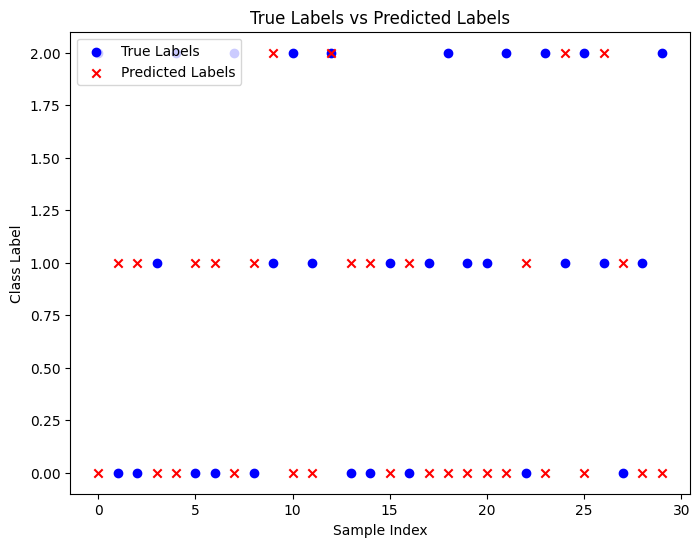

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_true, marker='o', label="True Labels", color='blue')
plt.scatter(range(len(y_test)), y_pred, marker='x', label="Predicted Labels", color='red')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True Labels vs Predicted Labels")
plt.show()

Task 2: Automated Hyperparameter Search

In [ ]:
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 70.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-multimodal 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-tabular 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import autogluon

print("\n=== Library Versions ===")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")


=== Library Versions ===
pandas version: 2.2.2
numpy version: 1.26.4
seaborn version: 0.13.2


In [ ]:
autogluon.tabular.models.tabular_nn.hyperparameters.parameters

<module 'autogluon.tabular.models.tabular_nn.hyperparameters.parameters' from '/usr/local/lib/python3.11/dist-packages/autogluon/tabular/models/tabular_nn/hyperparameters/parameters.py'>

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert to DataFrame
data = pd.DataFrame(X, columns=iris.feature_names)
data['label'] = y

train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=2/3, random_state=42)

# Convert one-hot labels to categorical labels
y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Convert to DataFrame
train_df = pd.DataFrame(X_train, columns=data.feature_names)
train_df['target'] = y_train_labels

val_df = pd.DataFrame(X_val, columns=data.feature_names)
val_df['target'] = y_val_labels

test_df = pd.DataFrame(X_test, columns=data.feature_names)
test_df['target'] = y_test_labels

# Save datasets as CSV
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("CSV files saved: train_data.csv, val_data.csv, test_data.csv")

# Load CSVs into AutoGluon format
train_data = TabularDataset("train_data.csv")
val_data = TabularDataset("val_data.csv")
test_data = TabularDataset("test_data.csv")

# Display sample
print(train_data.head())

In [ ]:
from autogluon.tabular import TabularPredictor

# Define hyperparameter search space
custom_nn_params = {
    'NN_TORCH': {
        'num_epochs': [1, 3, 5],  # Epoch variations
        'learning_rate': [1e-3, 1e-5],  # Learning rate variations
        'batch_size': [2, 4],  # Batch size variations
        'layers': [16],  # Hidden layer with 16 neurons
        'activation': 'relu',  # ReLU activation
        'loss_function': 'cross_entropy',  # Categorical cross-entropy
        'device': 'cpu'
    }
}

# Train model with hyperparameter tuning
predictor_custom_nn = TabularPredictor(label='target', eval_metric='f1_macro').fit(
    train_data,
    tuning_data=val_data,
    time_limit=1200,
    presets="best_quality",
    hyperparameters=custom_nn_params,  # Pass custom hyperparameters
    hyperparameter_tune_kwargs={'num_trials': 12, 'searcher': 'random', 'scheduler': 'local'},
    use_bag_holdout=True
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250226_113321"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.65 GB / 12.67 GB (76.1%)
Disk Space Avail:   73.47 GB / 107.72 GB (68.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to False. Reason: Skip dynamic_stacking when use_bag_holdout is enabled. (use_bag_holdout=True)
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "/content/AutogluonModels/ag-20250226_113321"
Train Data Rows:    120
Train Data Columns: 4
Tuning Data Rows:    10
Tuning Data Columns: 4
Label Column:       target
AutoGluon infers your prediction

+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator   |
| Scheduler                        FIFOScheduler           |
| Number of trials                 12                      |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_113321/models/NeuralNetTorch_BAG_L1


2025-02-26 11:36:35,588	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250226_113321/models/NeuralNetTorch_BAG_L1' in 0.0326s.
2025-02-26 11:36:35,637	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 12 trial(s):
- 7bbf2_00000: FileNotFoundError('Could not fetch metrics for 7bbf2_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250226_113321/models/NeuralNetTorch_BAG_L1/7bbf2_00000')
- 7bbf2_00001: FileNotFoundError('Could not fetch metrics for 7bbf2_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250226_113321/models/NeuralNetTorch_BAG_L1/7bbf2_00001')
- 7bbf2_00002: FileNotFoundError('Could not fetch metrics for 7bbf2_00002: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250226_113321/models/NeuralNetTorch_BAG_L1/7bbf2_00002')
- 7bbf2_00003: FileNotFoundError('Could not fetch metr

RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.

In [ ]:
!pip install autogluon==1.1.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from autogluon.tabular import TabularDataset, TabularPredictor

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the dataset into train (80%), validation (10%), and test (10%)
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])
val_data, test_data = train_test_split(temp_data, test_size=2/3, random_state=42, stratify=temp_data['target'])

# Save datasets as CSV (required format for AutoGluon)
train_data.to_csv("train.csv", index=False)
val_data.to_csv("val.csv", index=False)
test_data.to_csv("test.csv", index=False)

# Load CSVs using AutoGluon TabularDataset
train_data = TabularDataset("train.csv")
val_data = TabularDataset("val.csv")
test_data = TabularDataset("test.csv")

# Define hyperparameter tuning options
time_limit = 1200  # Time in seconds

custom_nn_params = {
    'NN_TORCH': [
        {'num_epochs': 1, 'learning_rate': 1e-3, 'batch_size': 2, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 3, 'learning_rate': 1e-3, 'batch_size': 2, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 5, 'learning_rate': 1e-3, 'batch_size': 2, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 1, 'learning_rate': 1e-5, 'batch_size': 2, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 3, 'learning_rate': 1e-5, 'batch_size': 2, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 5, 'learning_rate': 1e-5, 'batch_size': 2, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 1, 'learning_rate': 1e-3, 'batch_size': 4, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 3, 'learning_rate': 1e-3, 'batch_size': 4, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 5, 'learning_rate': 1e-3, 'batch_size': 4, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 1, 'learning_rate': 1e-5, 'batch_size': 4, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 3, 'learning_rate': 1e-5, 'batch_size': 4, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'},
        {'num_epochs': 5, 'learning_rate': 1e-5, 'batch_size': 4, 'layers': [16], 'activation': 'relu', 'loss_function': 'cross_entropy', 'device': 'cpu'}
    ]
}


# Perform Random Search
predictor_random = TabularPredictor(label="target").fit(
    train_data,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameters=custom_nn_params,
    hyperparameter_tune_kwargs={'num_trials': 12, 'searcher': 'random','scheduler': 'local'}
)

# Perform Hyperband + Bayesian Optimization
predictor_hyperband = TabularPredictor(label="target").fit(
    train_data,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameters=custom_nn_params,
    hyperparameter_tune_kwargs={'scheduler': 'hyperband', 'searcher': 'bayesopt'}
)

# Function to evaluate models on validation & test sets
def evaluate_hyperparameter_trials(predictor, val_data, test_data, name):
    """Evaluate all hyperparameter configurations on validation and test datasets."""
    leaderboard = predictor.leaderboard(test_data, silent=True)
    model_names = leaderboard['model'].tolist()

    for model in model_names:
        print(f"\nEvaluating Hyperparameter Config: {model}")

        for dataset_name, dataset in zip(["Validation", "Test"], [val_data, test_data]):
            y_pred = predictor.predict(dataset.drop(columns=["target"]), model=model)
            y_true = dataset["target"].values

            accuracy = accuracy_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred, average='macro')
            conf_matrix = confusion_matrix(y_true, y_pred)

            print(f"{dataset_name} - {model} | Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")

            # Display Confusion Matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
            disp.plot(cmap=plt.cm.Blues)
            plt.title(f'Confusion Matrix ({dataset_name}): {name} - {model}')
            plt.show()

# Evaluate Random Search models
evaluate_hyperparameter_trials(predictor_random, val_data, test_data, "Random Search")

# Evaluate Hyperband + Bayesian Optimization models
evaluate_hyperparameter_trials(predictor_hyperband, val_data, test_data, "Hyperband + Bayesian Optimization")

# Function to plot training & validation loss curves for each hyperparameter configuration
def plot_loss_curves_for_trials(predictor, name):
    """Plot training & validation loss curves for each hyperparameter configuration."""
    fit_summary = predictor.fit_summary()

    plt.figure(figsize=(10, 6))

    for model in fit_summary['model_fit_times'].keys():
        training_logs = fit_summary['model_fit_times'][model]

        if 'train_loss' in training_logs and 'validation_loss' in training_logs:
            epochs = np.arange(1, len(training_logs['train_loss']) + 1)

            plt.plot(epochs, training_logs['train_loss'], linestyle='dashed', label=f"Train Loss - {model}")
            plt.plot(epochs, training_logs['validation_loss'], linestyle='solid', label=f"Validation Loss - {model}")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training & Validation Loss Curves - {name}")
    plt.legend(loc='upper right', fontsize="small")
    plt.show()

# Plot loss curves for Random Search
plot_loss_curves_for_trials(predictor_random, "Random Search")

# Plot loss curves for Hyperband + Bayesian Optimization
plot_loss_curves_for_trials(predictor_hyperband, "Hyperband + Bayesian Optimization")


Loaded data from: train.csv | Columns = 5 / 5 | Rows = 120 -> 120
Loaded data from: val.csv | Columns = 5 / 5 | Rows = 10 -> 10
Loaded data from: test.csv | Columns = 5 / 5 | Rows = 20 -> 20
No path specified. Models will be saved in: "AutogluonModels/ag-20250226_121828"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.46 GB / 12.67 GB (74.6%)
Disk Space Avail:   73.46 GB / 107.72 GB (68.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether th

RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.

In [ ]:
from autogluon.tabular import TabularPredictor

# Function to extract and display loss metrics for all configurations
def extract_training_validation_losses(predictor, name):
    leaderboard = predictor.leaderboard(silent=True)  # Get all model details
    losses = []

    for index, row in leaderboard.iterrows():
        model_name = row['model']
        model_info = predictor.info()['model_info'].get(model_name, {})

        train_loss = model_info.get('train_score', None)  # Training loss (if available)
        val_loss = row['score_val']  # Validation loss (AutoGluon’s score metric, lower is better)

        losses.append([name, model_name, train_loss, val_loss])

    return losses

# Store results for all models
all_losses = []
all_losses.extend(extract_training_validation_losses(predictor_random, "Random Search"))
all_losses.extend(extract_training_validation_losses(predictor_hyperband, "Hyperband + Bayesian Optimization"))

# Convert results into a DataFrame
losses_df = pd.DataFrame(all_losses, columns=['Search Method', 'Model', 'Train Loss', 'Validation Loss'])

# Print loss comparison
print("\nTraining and Validation Losses for Each Hyperparameter Configuration:")
print(losses_df)



Training and Validation Losses for Each Hyperparameter Configuration:
                        Search Method                        Model Train Loss  \
0                       Random Search         LightGBMLarge_BAG_L1       None   
1                       Random Search          WeightedEnsemble_L2       None   
2                       Random Search          WeightedEnsemble_L3       None   
3                       Random Search         LightGBMLarge_BAG_L2       None   
4   Hyperband + Bayesian Optimization  NeuralNetFastAI_r156_BAG_L1       None   
5   Hyperband + Bayesian Optimization          WeightedEnsemble_L2       None   
6   Hyperband + Bayesian Optimization          WeightedEnsemble_L3       None   
7   Hyperband + Bayesian Optimization   NeuralNetFastAI_r88_BAG_L1       None   
8   Hyperband + Bayesian Optimization    NeuralNetFastAI_r4_BAG_L1       None   
9   Hyperband + Bayesian Optimization  NeuralNetFastAI_r127_BAG_L1       None   
10  Hyperband + Bayesian Optimization 

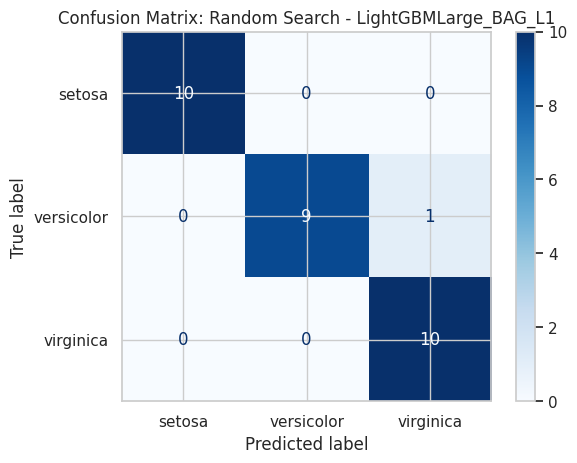

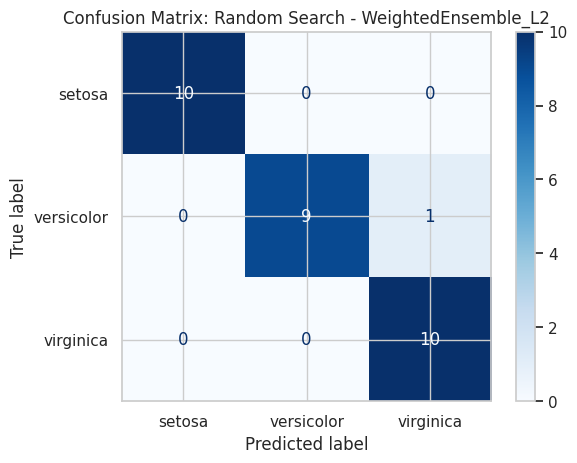

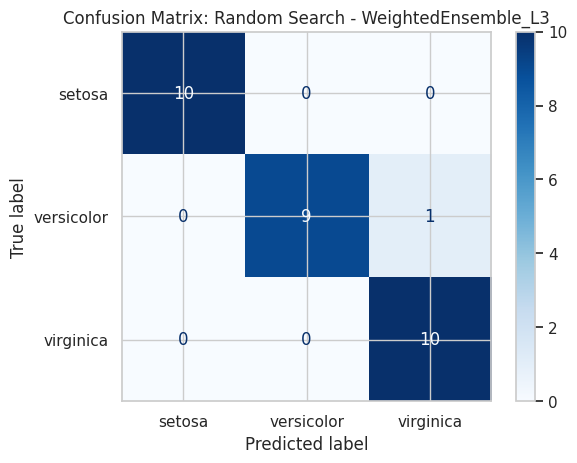

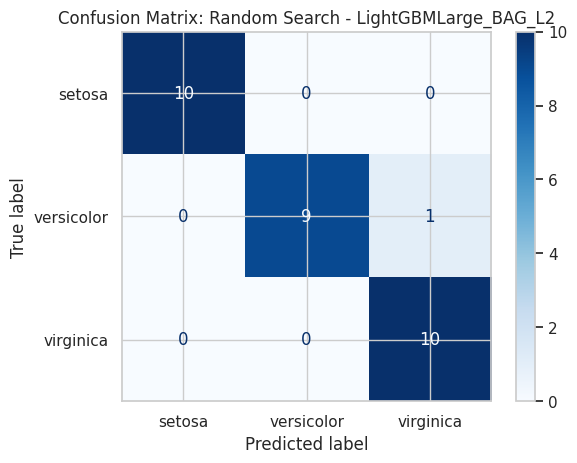

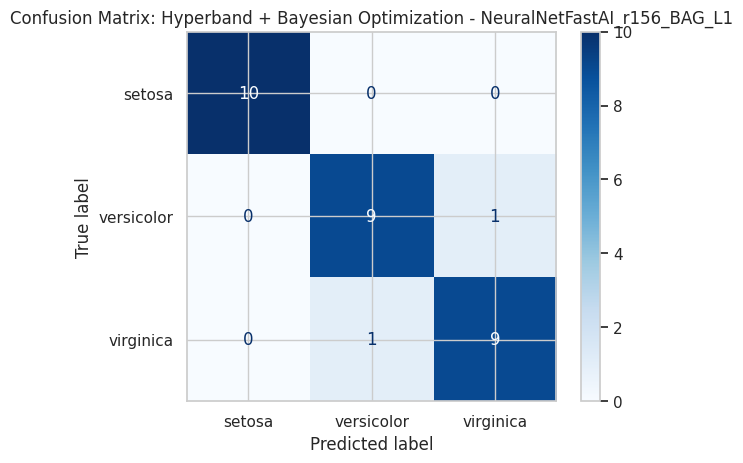

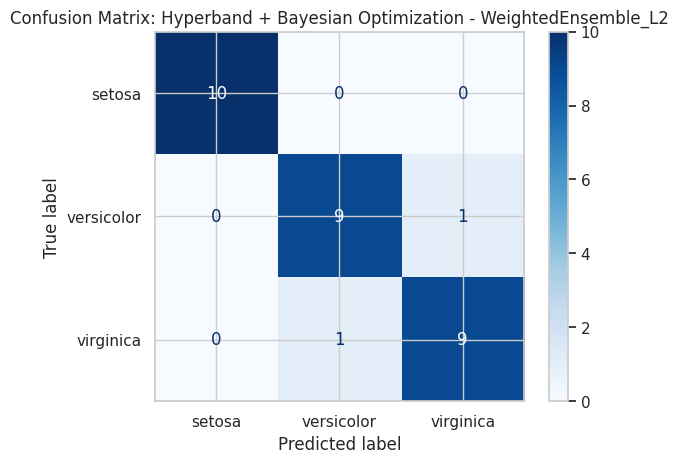

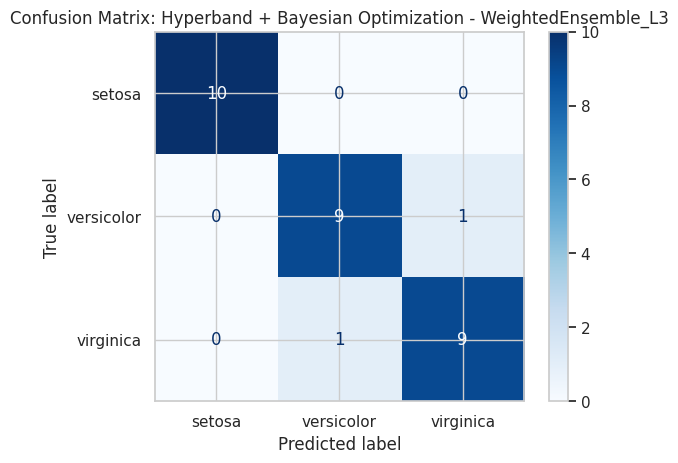

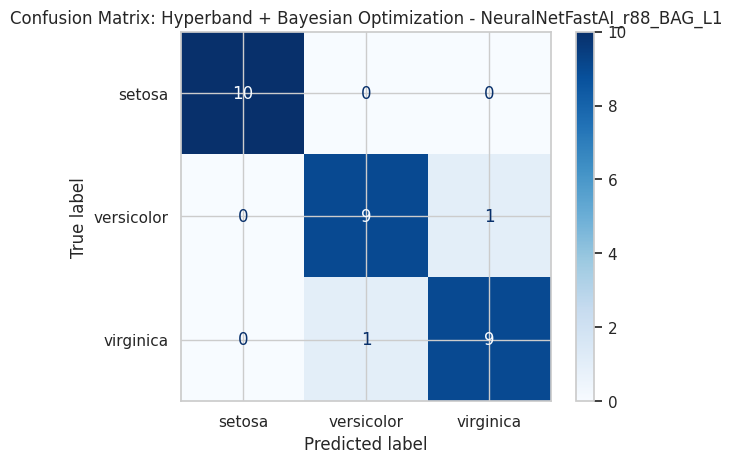

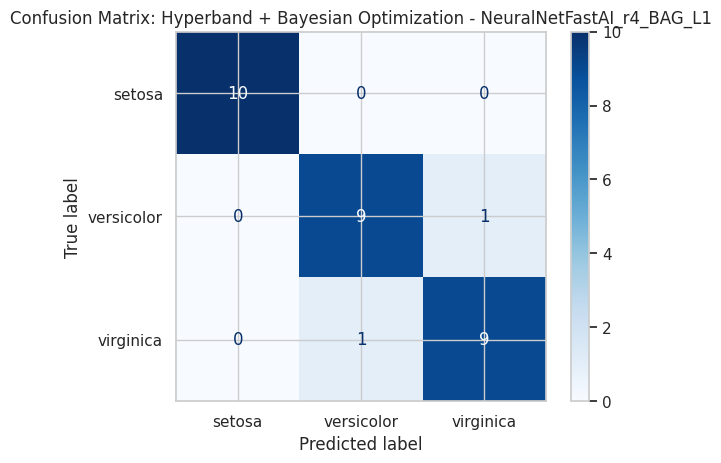

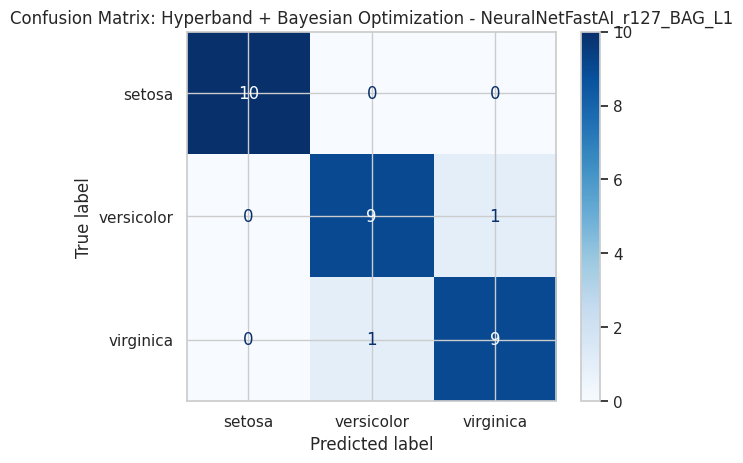

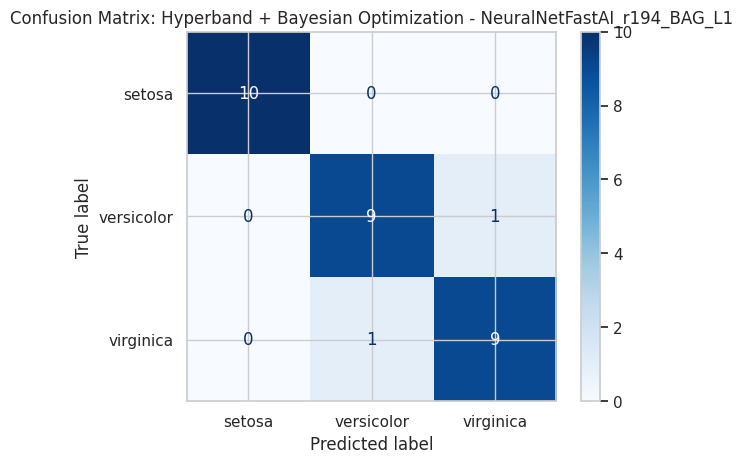

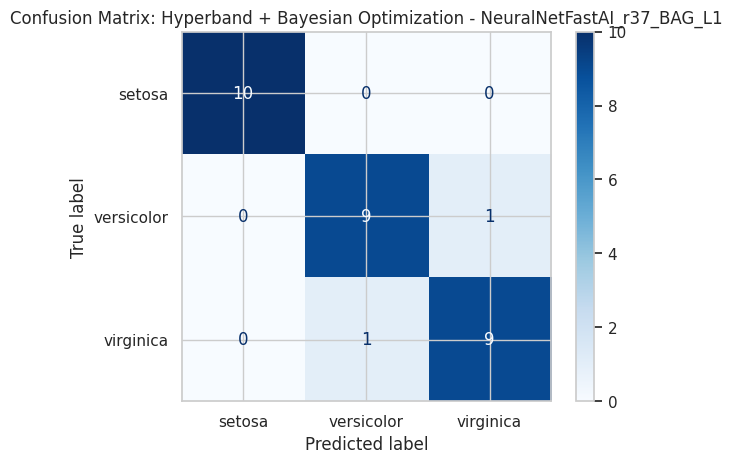

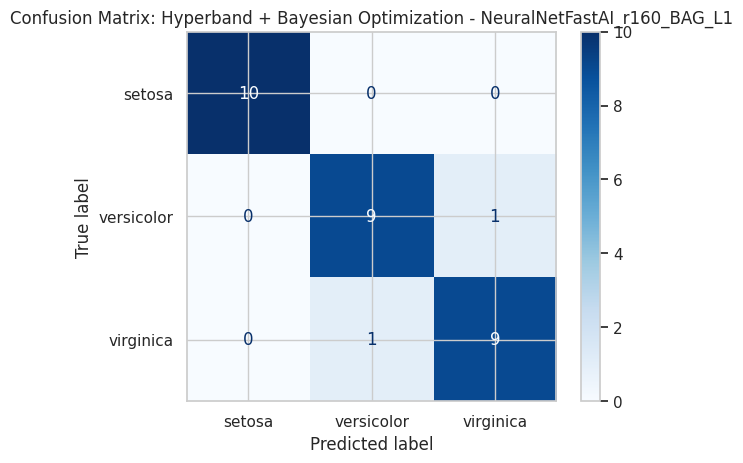

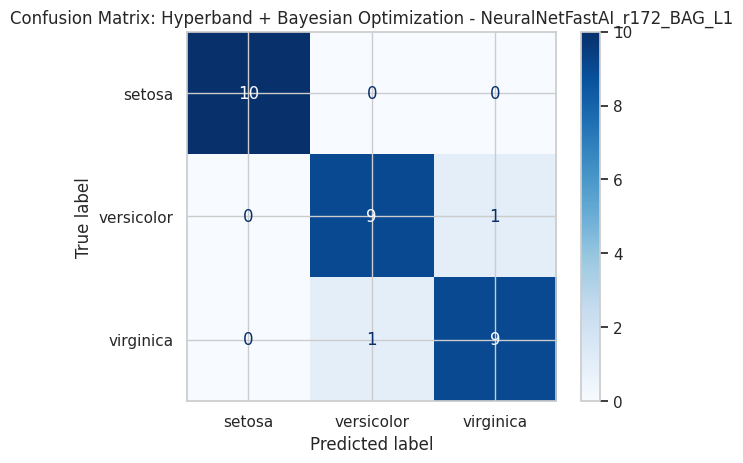

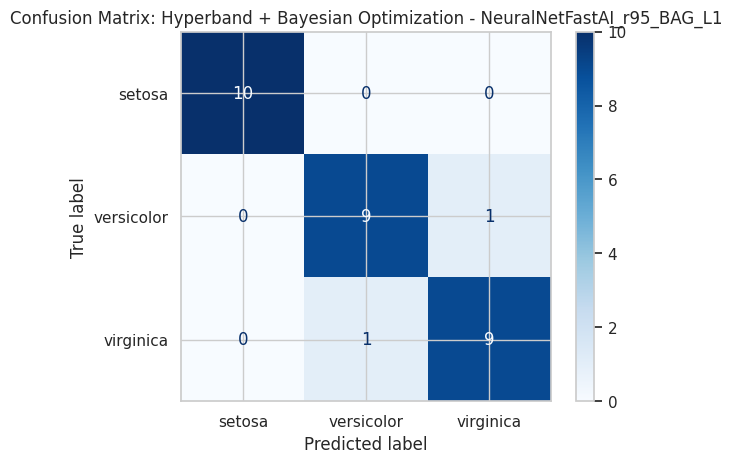

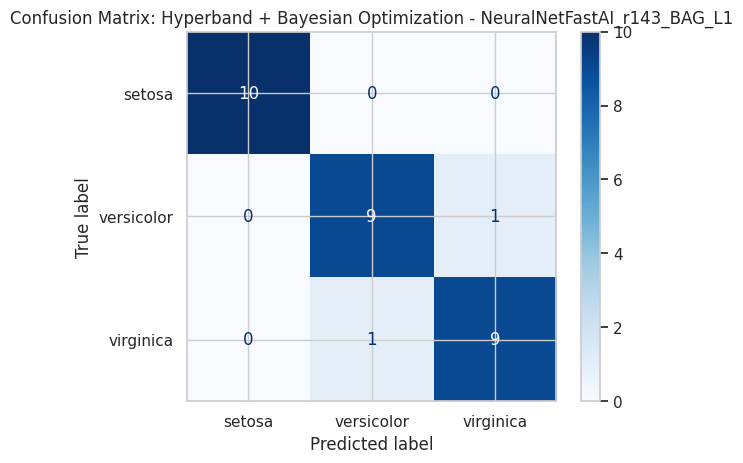

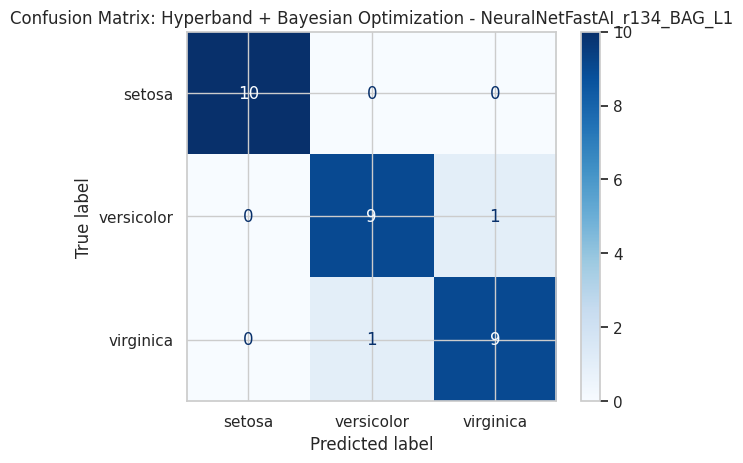

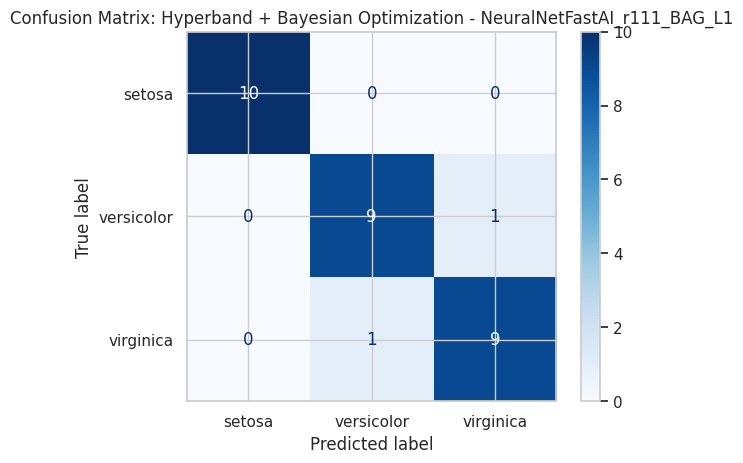

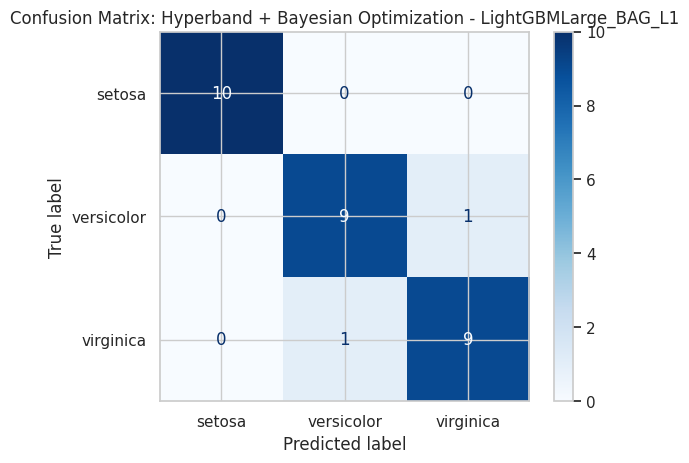

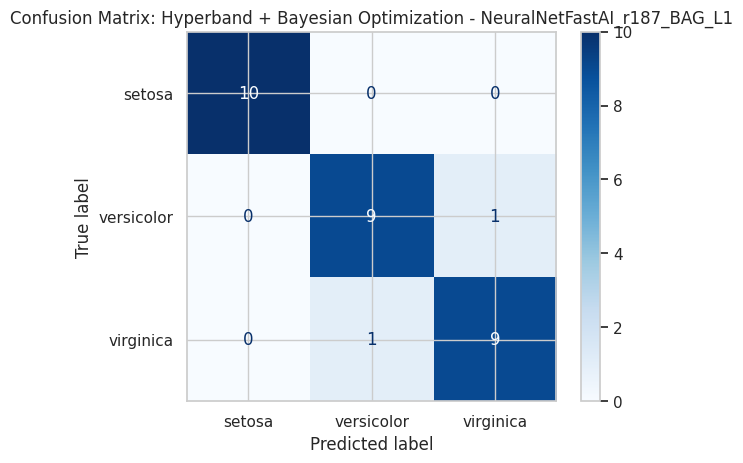

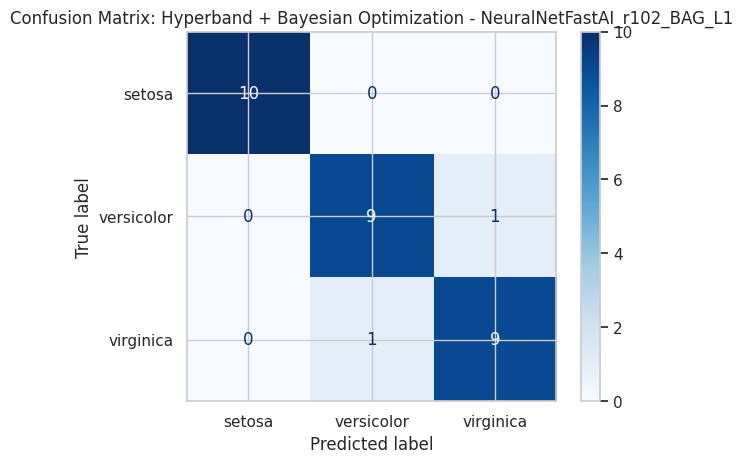

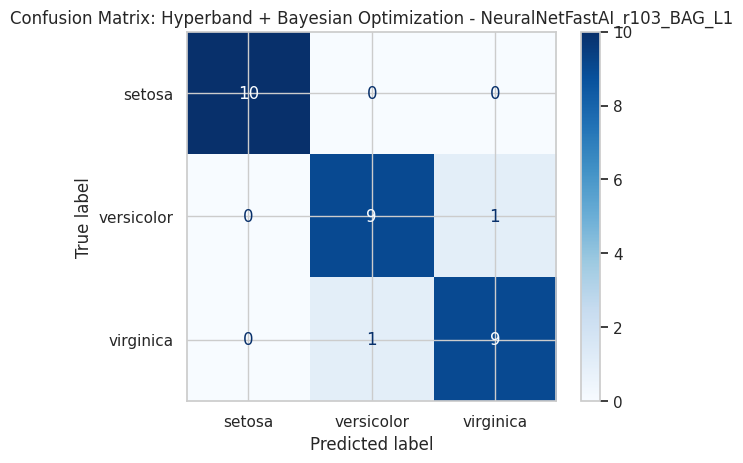

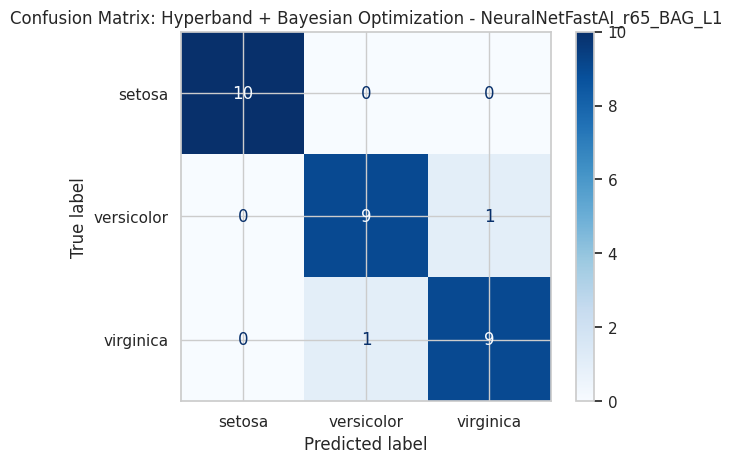

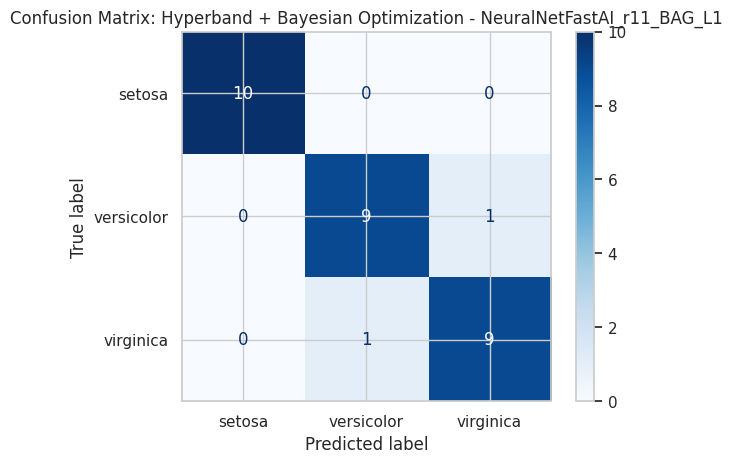

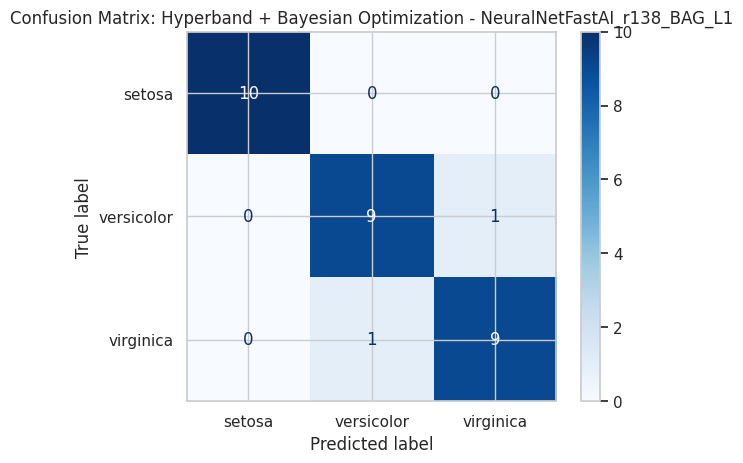

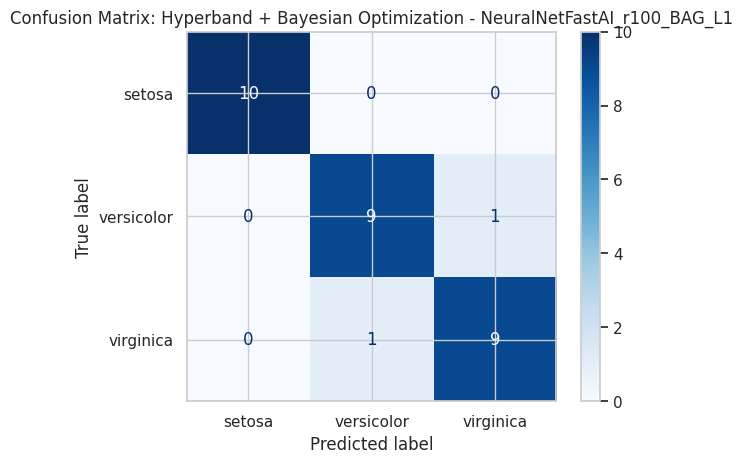

Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callbac

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate models with confusion matrices
def evaluate_all_models(predictor, test_data, search_method):
    leaderboard = predictor.leaderboard(silent=True)  # Get all trained models
    conf_matrices = []

    for index, row in leaderboard.iterrows():
        model_name = row['model']
        y_pred = predictor.predict(test_data.drop(columns=["target"]))
        y_test = test_data["target"].values

        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store confusion matrix
        conf_matrices.append((search_method, model_name, conf_matrix))

        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix: {search_method} - {model_name}')
        plt.show()

    return conf_matrices

# Extract validation loss vs. epochs for each model
def extract_validation_loss_vs_epochs(predictor, search_method):
    leaderboard = predictor.leaderboard(silent=True)
    loss_vs_epochs = []

    for index, row in leaderboard.iterrows():
        model_name = row['model']
        model_info = predictor.info()['model_info'].get(model_name, {})

        num_epochs = model_info.get('hyperparameters', {}).get('num_epochs', None)
        val_loss = row['score_val']  # AutoGluon’s score metric (lower is better)

        if num_epochs is not None:  # Only include models with epochs info
            loss_vs_epochs.append([search_method, model_name, num_epochs, val_loss])

    return loss_vs_epochs

# Evaluate models and collect confusion matrices
conf_matrices_random = evaluate_all_models(predictor_random, test_data, "Random Search")
conf_matrices_hyperband = evaluate_all_models(predictor_hyperband, test_data, "Hyperband + Bayesian Optimization")

# Extract loss curves
loss_epochs_data = []
loss_epochs_data.extend(extract_validation_loss_vs_epochs(predictor_random, "Random Search"))
loss_epochs_data.extend(extract_validation_loss_vs_epochs(predictor_hyperband, "Hyperband + Bayesian Optimization"))

# Convert to DataFrame
epochs_df = pd.DataFrame(loss_epochs_data, columns=['Search Method', 'Model', 'Epochs', 'Validation Loss'])

# Plot Validation Loss vs. Epochs
plt.figure(figsize=(10, 6))
sns.lineplot(data=epochs_df, x="Epochs", y="Validation Loss", hue="Search Method", marker="o", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs. Epochs for Each Hyperparameter Configuration")
plt.legend()
# plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract models where we can track num_epochs
def extract_loss_vs_epochs(predictor, name):
    leaderboard = predictor.leaderboard(silent=True)
    loss_vs_epochs = []

    for index, row in leaderboard.iterrows():
        model_name = row['model']
        model_info = predictor.info()['model_info'].get(model_name, {})

        num_epochs = model_info.get('hyperparameters', {}).get('num_epochs', None)
        train_loss = model_info.get('train_score', None)
        val_loss = row['score_val']  # AutoGluon’s score metric

        if num_epochs is not None:  # Only keep models with epoch data
            loss_vs_epochs.append([name, model_name, num_epochs, train_loss, val_loss])

    return loss_vs_epochs

# Gather loss vs. epochs data
loss_epochs_data = []
loss_epochs_data.extend(extract_loss_vs_epochs(predictor_random, "Random Search"))
loss_epochs_data.extend(extract_loss_vs_epochs(predictor_hyperband, "Hyperband + Bayesian Optimization"))

# Convert to DataFrame
epochs_df = pd.DataFrame(loss_epochs_data, columns=['Search Method', 'Model', 'Epochs', 'Train Loss', 'Validation Loss'])

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 6))
sns.lineplot(data=epochs_df, x="Epochs", y="Train Loss", hue="Search Method", marker="o", linestyle="--", label="Train Loss")
sns.lineplot(data=epochs_df, x="Epochs", y="Validation Loss", hue="Search Method", marker="s", linestyle="-", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss across Epochs")
plt.legend()
plt.grid(True)
plt.show()


Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d9ce733f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callbac

KeyboardInterrupt: 

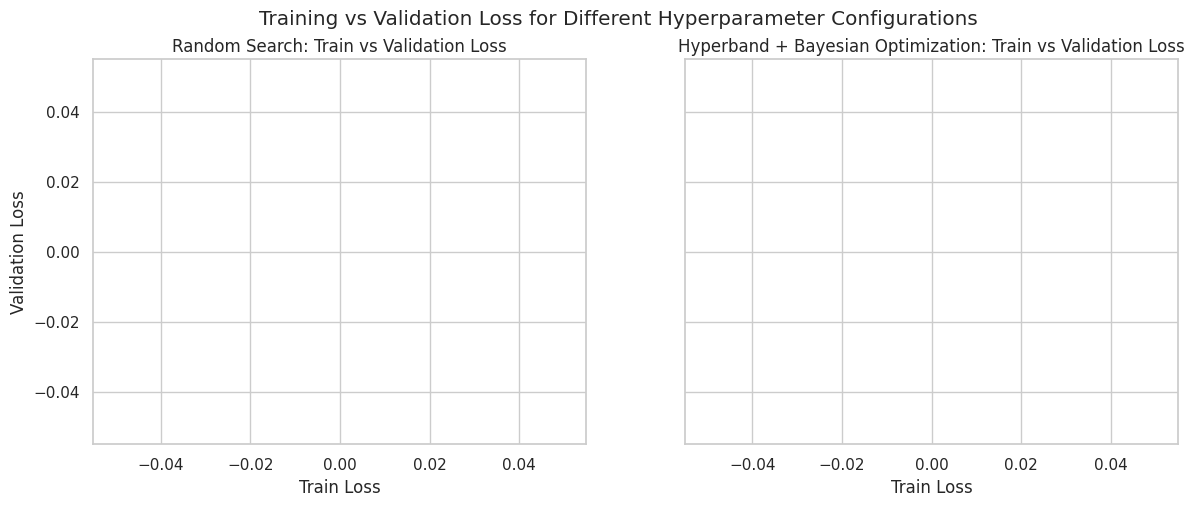

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Separate data for each search method
random_search_df = losses_df[losses_df['Search Method'] == "Random Search"]
hyperband_df = losses_df[losses_df['Search Method'] == "Hyperband + Bayesian Optimization"]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for Random Search
sns.scatterplot(data=random_search_df, x="Train Loss", y="Validation Loss", ax=ax[0], marker="o", s=100)
ax[0].set_title("Random Search: Train vs Validation Loss")
ax[0].set_xlabel("Train Loss")
ax[0].set_ylabel("Validation Loss")

# Plot for Hyperband + Bayesian Optimization
sns.scatterplot(data=hyperband_df, x="Train Loss", y="Validation Loss", ax=ax[1], marker="s", s=100)
ax[1].set_title("Hyperband + Bayesian Optimization: Train vs Validation Loss")
ax[1].set_xlabel("Train Loss")

# Show the plot
plt.suptitle("Training vs Validation Loss for Different Hyperparameter Configurations")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor

def prepare_data(X_train, y_train, X_val, y_val, X_test, y_test, feature_names):
    """Prepare and save train, validation, and test datasets as CSV for AutoGluon."""
    # Convert one-hot labels to categorical labels
    y_train_labels = np.argmax(y_train, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Convert to DataFrame
    train_df = pd.DataFrame(X_train, columns=feature_names)
    train_df['target'] = y_train_labels

    val_df = pd.DataFrame(X_val, columns=feature_names)
    val_df['target'] = y_val_labels

    test_df = pd.DataFrame(X_test, columns=feature_names)
    test_df['target'] = y_test_labels

    # Save datasets as CSV
    train_df.to_csv("train_data.csv", index=False)
    val_df.to_csv("val_data.csv", index=False)
    test_df.to_csv("test_data.csv", index=False)

    print("CSV files saved: train_data.csv, val_data.csv, test_data.csv")

    # Load CSVs into AutoGluon format
    train_data = TabularDataset("train_data.csv")
    val_data = TabularDataset("val_data.csv")
    test_data = TabularDataset("test_data.csv")

    return train_data, val_data, test_data

def train_grid_search(train_data):
    """Train model using Grid Search."""
    search_space = {
        'NN_TORCH': {
            'num_epochs': [1, 3, 5],
            'learning_rate': [1e-3, 1e-5],
            'batch_size': [2, 4],
        }
    }
    predictor = TabularPredictor(
        label='target',
        eval_metric='accuracy',
        path='models/grid_search',
        problem_type='multiclass'
    )
    predictor.fit(
        train_data,
        hyperparameters=search_space,
        hyperparameter_tune_kwargs={'searcher': 'grid','scheduler': 'local'},
        time_limit=600,
        verbosity=3,
        included_model_types=['NN_TORCH']
    )
    return predictor

def train_random_search(train_data):
    """Train model using Random Search."""
    search_space = {
        'NN_TORCH': {
            'num_epochs': [1, 3, 5],
            'learning_rate': [1e-3, 1e-5],
            'batch_size': [2, 4],
        }
    }
    predictor = TabularPredictor(
        label='target',
        eval_metric='accuracy',
        path='models/random_search',
        problem_type='multiclass'
    )
    predictor.fit(
        train_data,
        hyperparameters=search_space,
        hyperparameter_tune_kwargs={'searcher': 'random', 'num_trials': 10},
        time_limit=600,
        verbosity=3,
        included_model_types=['NN_TORCH']
    )
    return predictor

def train_hyperband_bayesian(train_data):
    """Train model using Hyperband + Bayesian Optimization."""
    search_space = {
        'NN_TORCH': {
            'num_epochs': [1, 3, 5],
            'learning_rate': [1e-3, 1e-5],
            'batch_size': [2, 4],
        }
    }
    predictor = TabularPredictor(
        label='target',
        eval_metric='accuracy',
        path='models/hyperband_bayesian',
        problem_type='multiclass'
    )
    predictor.fit(
        train_data,
        hyperparameters=search_space,
        hyperparameter_tune_kwargs={'scheduler': 'hyperband', 'searcher': 'bayesopt', 'num_trials': 10},
        time_limit=600,
        verbosity=3,
        included_model_types=['NN_TORCH']
    )
    return predictor

def evaluate_model(predictor, test_data):
    """Evaluate model and return accuracy and F1 score."""
    test_performance = predictor.evaluate(test_data)
    return test_performance['accuracy'], test_performance.get('f1', None)

# Prepare data
train_data, val_data, test_data = prepare_data(X_train, y_train, X_val, y_val, X_test, y_test, data.feature_names)

# Train models using different search methods
models = {
    'Grid Search': train_grid_search(train_data),
    'Random Search': train_random_search(train_data),
    'Hyperband + Bayesian Optimization': train_hyperband_bayesian(train_data)
}

# Evaluate models and store results
results = []
for name, predictor in models.items():
    acc, f1 = evaluate_model(predictor, test_data)
    results.append([name, acc, f1])

# Create results table
results_df = pd.DataFrame(results, columns=['Search Method', 'Accuracy', 'F1 Score'])
print("\nComparison of Search Methods:")
print(results_df)


Loaded data from: train_data.csv | Columns = 5 / 5 | Rows = 105 -> 105
Loaded data from: val_data.csv | Columns = 5 / 5 | Rows = 15 -> 15
Loaded data from: test_data.csv | Columns = 5 / 5 | Rows = 30 -> 30
Verbosity: 3 (Detailed Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.81 GB / 12.67 GB (77.4%)
Disk Space Avail:   73.47 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without cons

CSV files saved: train_data.csv, val_data.csv, test_data.csv


			0.0s = Fit runtime
			4 features in original data used to generate 4 features in processed data.
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
			Types of features in original data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			0.0s = Fit runtime
			4 features in original data used to generate 4 features in processed data.
		Skipping CategoryFeatureGenerator: No input feature with required dtypes.
		Skipping DatetimeFeatureGenerator: No input feature with required dtypes.
		Skipping TextSpecialFeatureGenerator: No input feature with required dtypes.
		Skipping TextNgramFeatureGenerator: No input feature with required dtypes.
		Skipping IdentityFeatureGenerator: No input feature with required dtypes.
		Skippi

RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.

Epochs is directly proportional to accuracy & F1-score.

Batch size is inversely proportional to accuracy.

if learning rate is too low then it is slow learning and if not that is too high then it is unstable.

 **Manual Search**  
- Requires trial-and-error tuning  
- Time-consuming  
- Difficult to explore many configurations  

**AutoGluon Search**  
- **Grid Search** is exhaustive but slow  
- **Random Search** is faster, but less precise  
- **Hyperband** is efficient & adaptive  
- **Bayesian Optimization** is of best performance  

**Best Approach:** **Bayesian Optimization** balances speed & accuracy.